# Decision Tree

## 1. Entropy-:

##  -(p(+) * log(P(+)) + p(-) * log(P(-)))

It is the Purity of subset of a tree.

p(+) is probabilitly of positive

p(-) is probability of negative

For Example-:

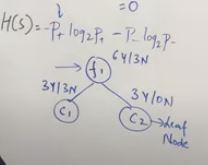





Suppose f1,f2,f3 are features and they have values as-:

f1-: 6Y/3N

f2-: 3Y/3N

f3-: 3Y/0N

f1 entropy can be calculated as-:

P(+) = 6/9

P(-) = 3/9

Put it in the formula and calculate the entropy.

## 2. Information Gain-:

## Gain(S,A) = H(S) - Σval|Sv|/|S|* H(Sv)

H(S) is entropy of root feature

Sv is split sum

S is the total of population

H(Sv) is entropy of splits

Σval for all splits

For Example-:

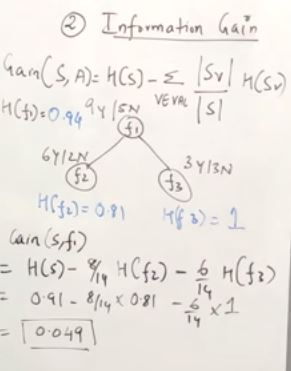

## 3. Ginni Impurity-:

## GI = 1 - nΣi=1 (P)**2

## GI = 1 - ( (P+)2 + (P-)2 )

p(+) is probabilitly of positive

p(-) is probability of negative

Maximum value is 0.5 for ginni impurity and 1 for Entropy.

For Example-:

For 3Y and 3N split

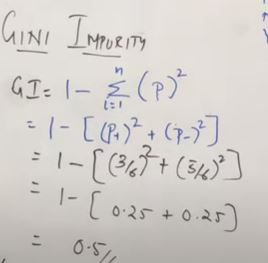

# Implementation Of DT Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

UsageError: unrecognized arguments: encoding


In [96]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [99]:
target = df["species"]

In [100]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [101]:
target.replace({"setosa":0, "versicolor":1, "virginica":2}, inplace = True)

In [102]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [103]:
x = df.drop("species",axis = 1)

In [104]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [105]:
y = target

In [106]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
dt_gini = DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=2)
dt_en = DecisionTreeClassifier(criterion = "entropy",random_state = 42)

In [133]:
dt_gini.fit(X_train, y_train)
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [134]:
y_pred = dt_gini.predict(X_test)
y_pred1 = dt_en.predict(X_test)

In [135]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [136]:
y_pred1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [137]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [114]:
print("Classification report - \n", classification_report(y_test,y_pred1))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

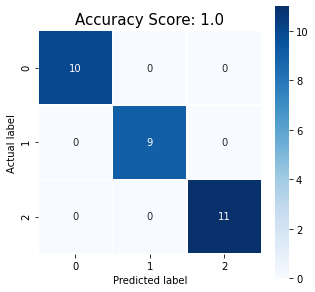

In [115]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dt_gini.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

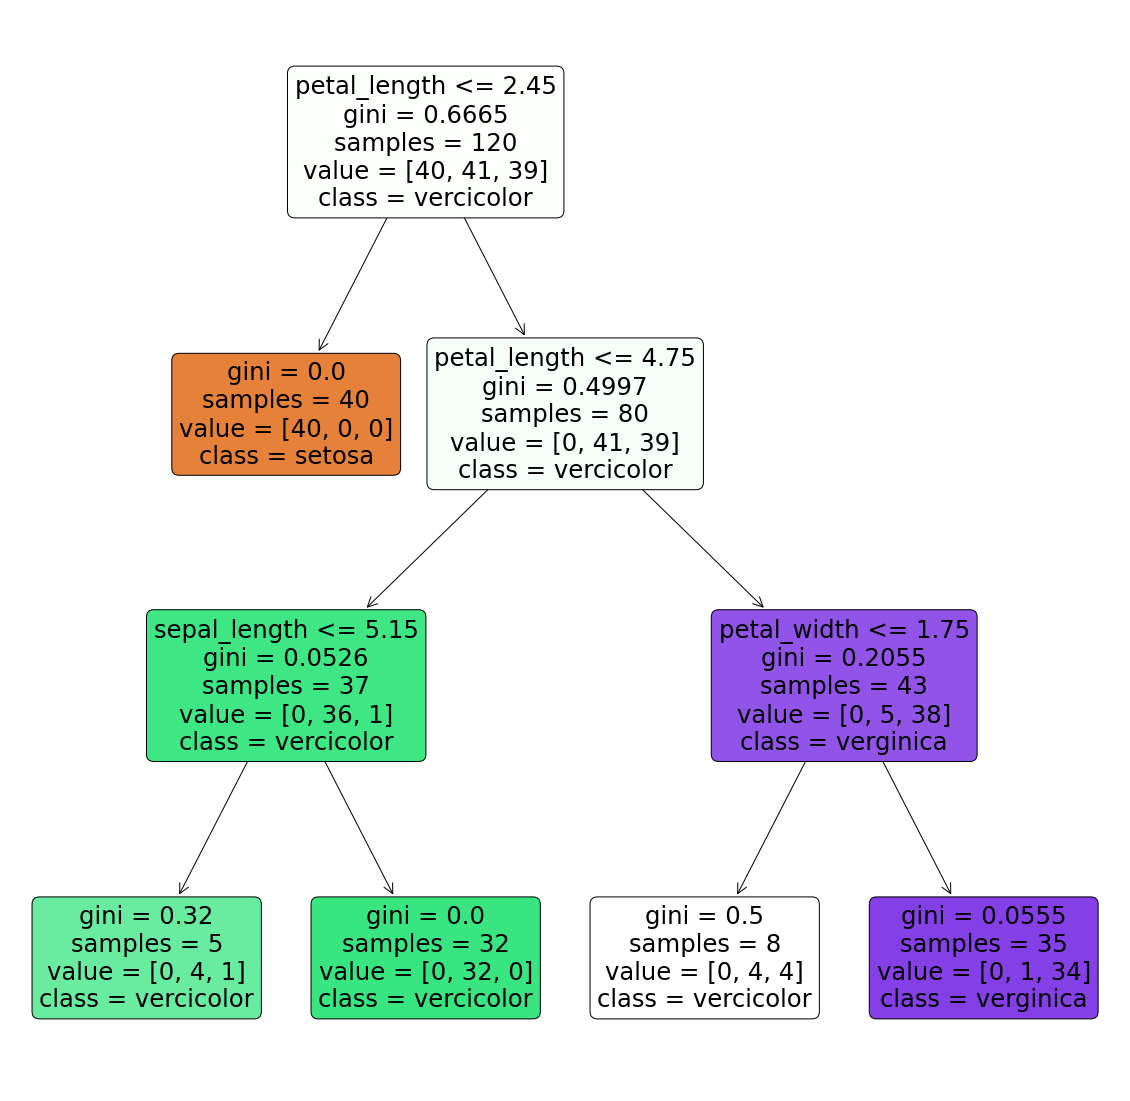

In [116]:

plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dt_gini, feature_names = df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

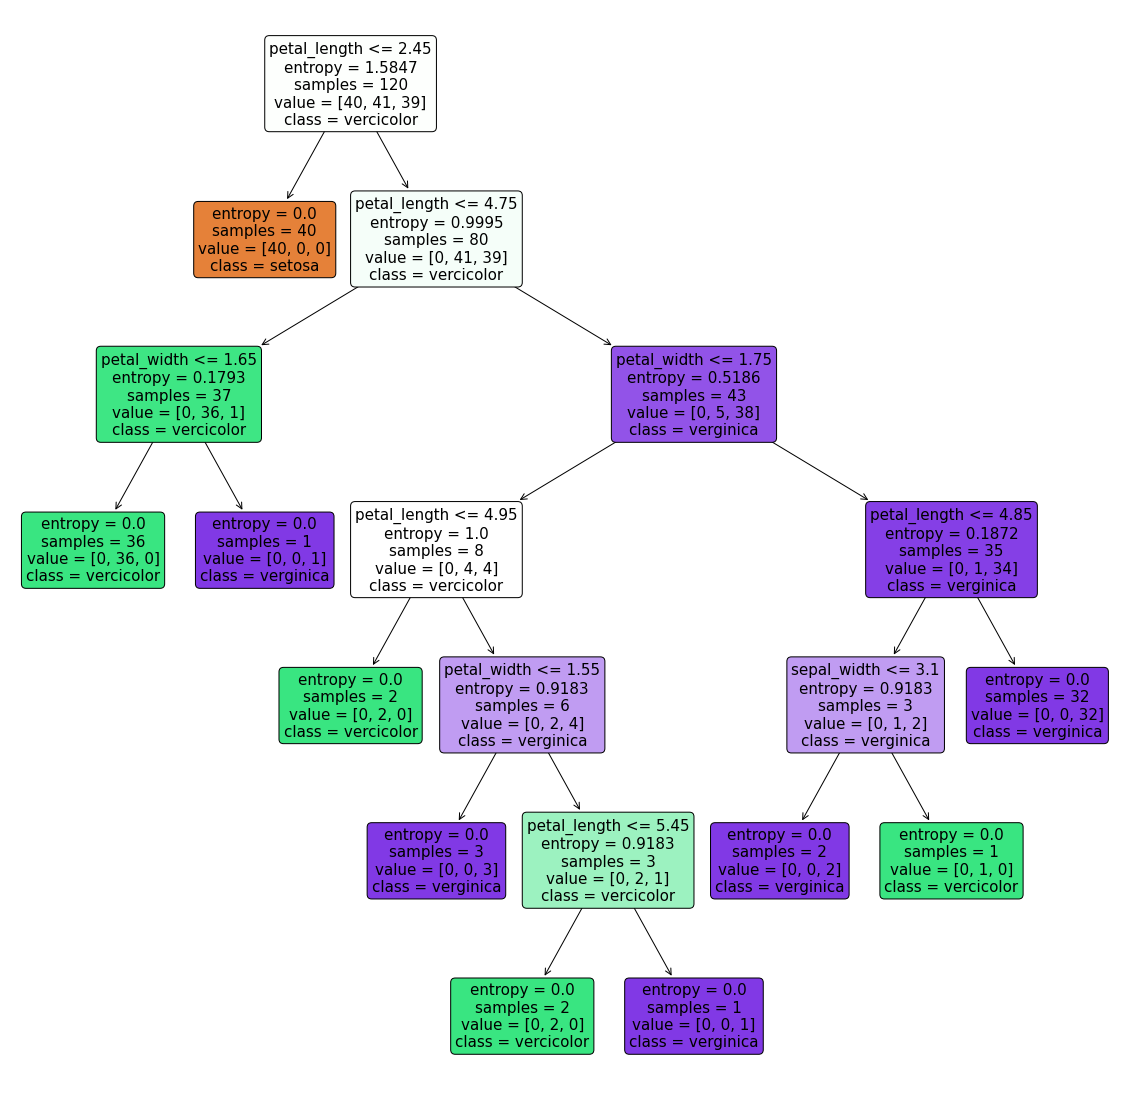

In [117]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dt_en, feature_names = df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

In [118]:
y_train


22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64

In [119]:
X_train.shape

(120, 4)

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
params = {'criterion':["gini","entropy"], 'max_depth': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring="f1_macro",verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 588 candidates, totalling 1764 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1764 out of 1764 | elapsed:   10.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_macro', verbose=1)

In [139]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [140]:
grid_search_cv = grid_search_cv.best_estimator_

In [141]:
y_pred = grid_search_cv.predict(X_test)

In [142]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



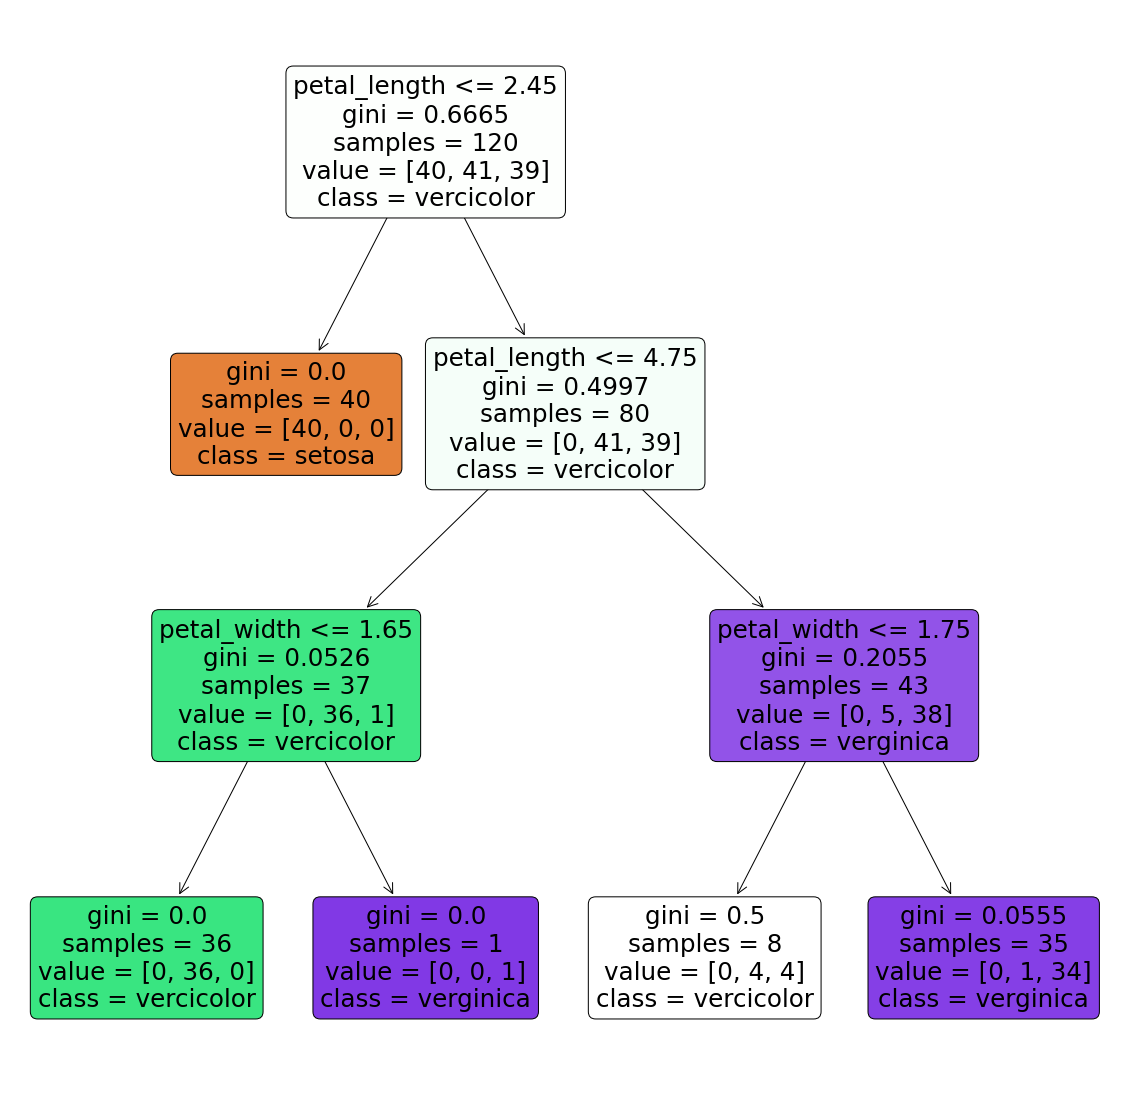

In [143]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=grid_search_cv, feature_names = df.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)